<a href="https://colab.research.google.com/github/ImaneElAssari/HouseCostPrediction/blob/master/HouseCostPredictionModel1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


**Load some house value vs. crime rate data**

This dataset is from Philadelphia,PA and includes average houses sales proce in a number of neighbohoods.The attributes of each neighborhood we have include the crime rate ('CrimeRate), miles from center city('MilesPhila'), town name ('Name'), and country name('Country')

In [ ]:
sales=pd.read_csv('/content/Philadelphia_Crime_Rate_noNA.csv')
sales.head()

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
0,140463,14.0463,29.7,10.0,-1.0,Abington,Montgome
1,113033,11.3033,24.1,18.0,4.0,Ambler,Montgome
2,124186,12.4186,19.5,25.0,8.0,Aston,Delaware
3,110490,11.0490,49.4,25.0,2.7,Bensalem,Bucks
4,79124,7.9124,54.1,19.0,3.9,Bristol B.,Bucks


**Exploring the Data**

In [ ]:
sales.describe()

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg
count,99.000000,99.000000,99.000000,99.000000,98.000000
mean,157835.606061,15.783561,32.576768,19.282828,2.479592
std,86644.159973,8.664416,37.540908,9.099552,5.632307
min,28000.000000,2.800000,6.600000,0.000000,-9.200000
25%,98505.000000,9.850500,17.400000,13.000000,-0.625000
50%,140463.000000,14.046300,24.100000,20.000000,1.600000
75%,195830.000000,19.583000,39.800000,24.500000,4.775000
max,475112.000000,47.511200,366.100000,50.000000,26.900000


The house price in town is correlated with the crime rate of that town.Low crime towns tend to be associated with higher house prices and vice versa.

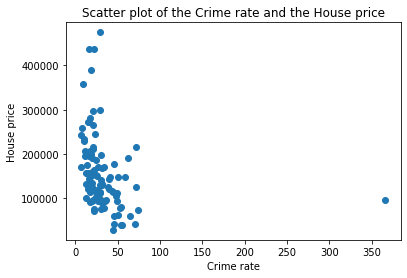

In [ ]:
plt.scatter(sales['CrimeRate'],sales['HousePrice'])
plt.title('Scatter plot of the Crime rate and the House price')
plt.xlabel('Crime rate')
plt.ylabel('House price')
plt.show()

**Fit the regression model using crime as the feature**

Note: linregress() has many outputs, we are going to focus on the slope and the intercept.

In [ ]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(sales['CrimeRate'], sales['HousePrice'])

slope=  -576.9081276823896
The Linear Regression equation is: F(x)= -576.9081276823896 * x + 176629.40810695427


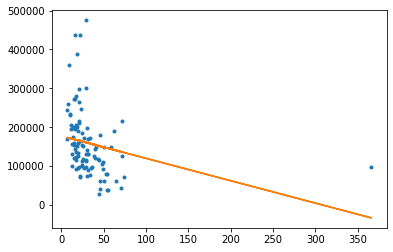

In [ ]:
def predict(x):
   return slope * x + intercept
crime_model = predict(sales['CrimeRate'])
plt.plot(sales['CrimeRate'],sales['HousePrice'],'.',
         sales['CrimeRate'], crime_model, '-')
print("slope= ",slope)
print("The Linear Regression equation is: F(x)=", slope,"* x +",intercept )

Above: blue dots are the original data, orange line os the fit form of the simple regression

**Remove Center City and redo the analysis**

Center City is the one with an extremely high crime rate, yet house prices are not verylow. This point does not follow the trend of the rest of the data very well. A question is how much including Center City is influencing our fit on the other datapoints.Let's remove this datapoint and see what happens.

In [ ]:
sales_noCC = sales[sales['MilesPhila']!=0.0]

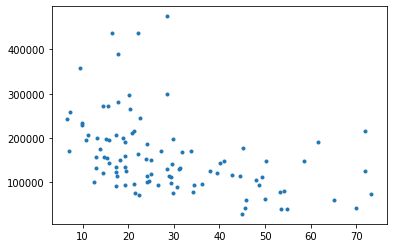

In [ ]:
plt.plot(sales_noCC['CrimeRate'],sales_noCC['HousePrice'],'.')

**Refit our simple regression model on this modifies dataset:**

In [ ]:
slope, intercept, r_value, p_value, std_err = stats.linregress(sales_noCC['CrimeRate'], sales_noCC['HousePrice'])

slope=  -2288.6894299483624
The Linear Regression equation is: F(x)= -2288.6894299483624 * x + 225233.55183900375


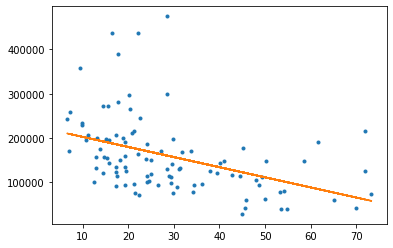

In [ ]:
def predict(x):
   return slope * x + intercept
crime_model_noCC = predict(sales_noCC['CrimeRate'])
plt.plot(sales_noCC['CrimeRate'],sales_noCC['HousePrice'],'.',
         sales_noCC['CrimeRate'], crime_model_noCC, '-')
print("slope= ",slope)
print("The Linear Regression equation is: F(x)=", slope,"* x +",intercept )

**Compare coefficients for full-data fit versus no-Center-City fit**

Visually the fit seems different, butlet's quantify this by examining the estimates coefficients of our original fit and that of the modified dataset with Center City removed.

The Linear Regression fit for the first model (Original Data) is : F(x)= -576.9081276823896 * x + 176629.40810695427 

The Linear Regression fit for the second model (without the center city) is: F(x)= -2288.6894299483624 * x + 225233.55183900375

We can note that for the "no Center City" version, per unit increases in Crime, the predicted decrease in house price is 2.287.
In constrast, for the original dataset, the drop is only 576 per unit increase in crime. This is significantly different!

**High leverage points :**


Center City is said to be a "high leverage" point because it is at an extreme x value where there are not other observations.As a result, reaclling the closed-form solution for simple regression, this point has the potential to dramatically change the least squares line since the center of x mass is heavly influenced by this one point and the least squares line will try to fit close to that outlying (in x) point. If a high leverage point follows the trend of the other data,this might not hvae much effect. On the other hand, if this point somehow differs, it can be strongly influential in the resulting fit.

**Influential observations:**

As influential observation is one where the removal of the point significantly changes the fit. As discussed above, high leverage points are good candidates for being influential observations, but need not be. Other observations that are not leverage points can also be influential observations(e.g : strongly outlying  in y even if x is a typical value).


**Remove high-value outlier neighborhoods and redo analysis**

 Based on the disscution above, a question is whether the outlying high value towns are strongly influencing the fit.Let's remove  them and see what happens.
 

In [ ]:
sales_nohighend = sales_noCC[sales_noCC['HousePrice']<350000]
slope, intercept, r_value, p_value, std_err = stats.linregress(sales_nohighend['CrimeRate'], sales_nohighend['HousePrice'])


slope=  -1838.562648589964
The Linear Regression equation is: F(x)= -1838.562648589964 * x + 199098.85266980447


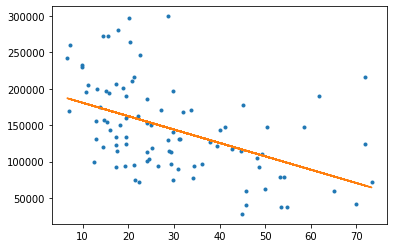

In [ ]:
def predictBis(x):
   return slope * x + intercept
crime_model_nohighend = predictBis(sales_nohighend['CrimeRate'])
plt.plot(sales_nohighend['CrimeRate'],sales_nohighend['HousePrice'],'.',
         sales_nohighend['CrimeRate'], crime_model_nohighend, '-')
print("slope= ",slope)
print("The Linear Regression equation is: F(x)=", slope,"* x +",intercept )

**Do the coefficients change much?**

Above: We can note that removing the outlying high-value neighborhoods has some effect on the fit, but not nearly as much as our high-leverage Center City datapoint